
FedLR Spambase
10% high-quality -> 100.0%  full coalition appeared as NE
20% high-quality -> 100.0%  full coalition appeared as NE
40% high-quality -> 100.0%  full coalition appeared as NE
60% high-quality -> 100.0%  full coalition appeared as NE
70% high-quality -> 100.0%  full coalition appeared as NE

A lower-bound threshold is approximately 10% high-quality data for which the full coalition is stable at least 90% of the times.


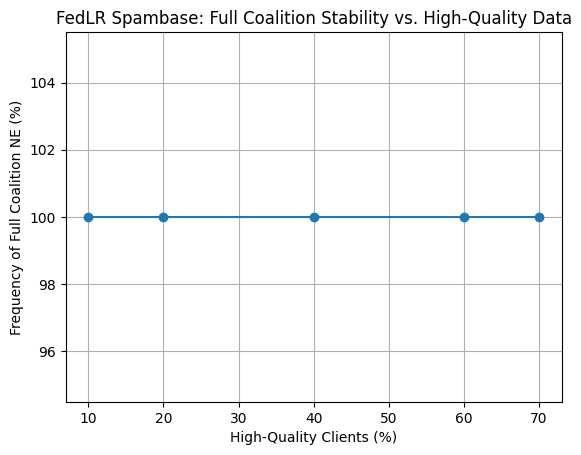


FedFor Spambase
10% high-quality -> 100.0%  full coalition appeared as NE
20% high-quality -> 100.0%  full coalition appeared as NE
40% high-quality -> 100.0%  full coalition appeared as NE
60% high-quality -> 100.0%  full coalition appeared as NE
70% high-quality -> 100.0%  full coalition appeared as NE

A lower-bound threshold is approximately 10% high-quality data for which the full coalition is stable at least 90% of the times.


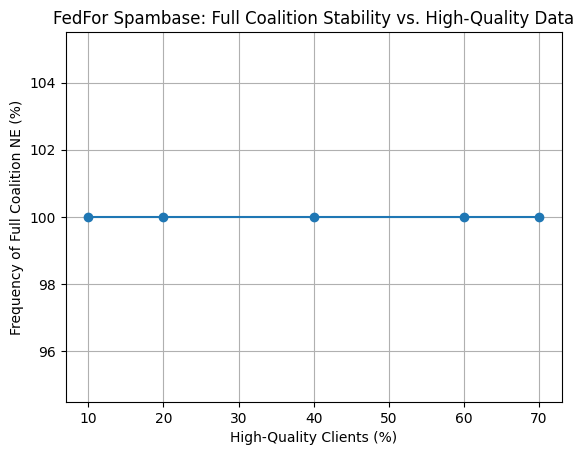


FedLR HuGaDB
10% high-quality -> 41.2%  full coalition appeared as NE
20% high-quality -> 58.8%  full coalition appeared as NE
40% high-quality -> 91.2%  full coalition appeared as NE
60% high-quality -> 97.5%  full coalition appeared as NE
70% high-quality -> 100.0%  full coalition appeared as NE

A lower-bound threshold is approximately 40% high-quality data for which the full coalition is stable at least 90% of the times.


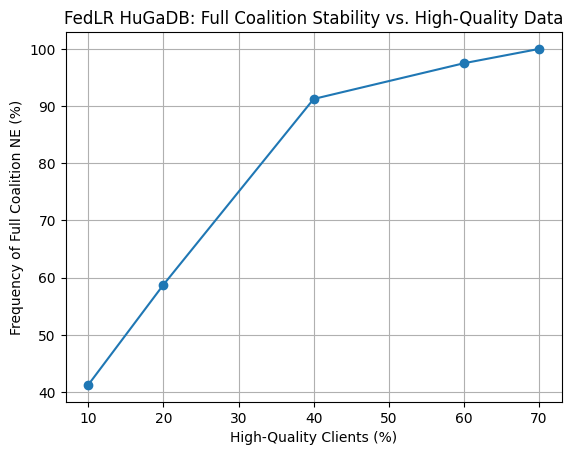


FedFor HuGaDB
10% high-quality -> 87.5%  full coalition appeared as NE
20% high-quality -> 100.0%  full coalition appeared as NE
40% high-quality -> 100.0%  full coalition appeared as NE
60% high-quality -> 100.0%  full coalition appeared as NE
70% high-quality -> 100.0%  full coalition appeared as NE

A lower-bound threshold is approximately 20% high-quality data for which the full coalition is stable at least 90% of the times.


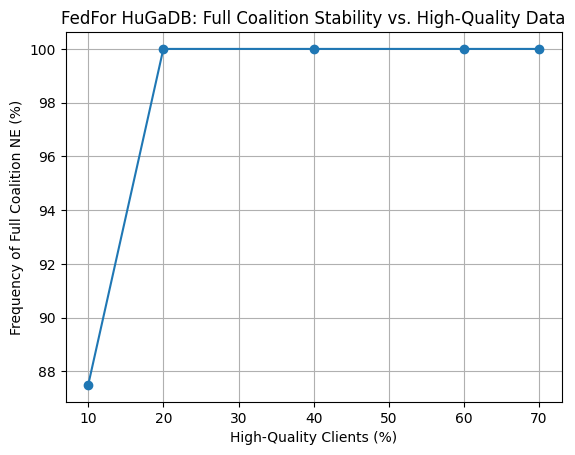

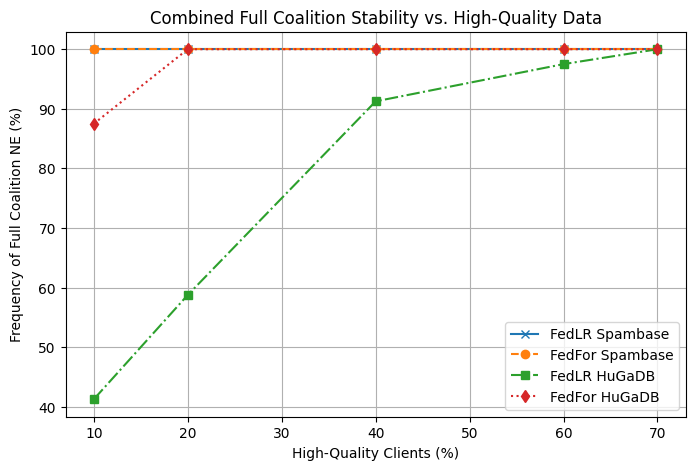

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


conditions = ['3 Low-Quality Clients', '4 Low-Quality Clients', 
              '6 Low-Quality Clients', '8 Low-Quality Clients', 
              '9 Low-Quality Clients']


def process_file(file_path, total_runs, label):
    df = pd.read_csv(file_path)
    
    full_coalition_value = 1111111111
    # Calculate high-quality percentage for each condition
    high_quality_pct = {cond: (10 - int(cond.split()[0]))/10*100 for cond in conditions}
    
   
    stability_results = {}
    for cond in conditions:
        full_coalition_count = df.loc[df['Nash Equilibrium'] == full_coalition_value, cond].iloc[0]
        stability_fraction = full_coalition_count / total_runs if total_runs > 0 else None
        stability_results[high_quality_pct[cond]] = stability_fraction
        

    sorted_results = dict(sorted(stability_results.items()))
    

    print(f"\n{label}")
    for hq, frac in sorted_results.items():
        print(f"{hq:.0f}% high-quality -> {frac*100:.1f}%  full coalition appeared as NE")

    

    x = list(sorted_results.keys())
    y = [v * 100 for v in sorted_results.values()]

    target_stability = 90  # target in percent
    eligible = [hq for hq, stability in sorted_results.items() if stability*100 >= target_stability]
    if eligible:
        threshold = min(eligible)
        print(f"\nA lower-bound threshold is approximately {threshold:.0f}% high-quality data "
            f"for which the full coalition is stable at least {target_stability}% of the times.")

        
    return x, y


experiments = [
    { "file": "/.../results/plots/FedLR_Spambase_With_LQC2.csv", "total_runs": 20, "label": "FedLR Spambase" },
    { "file": "/.../results/plots/FedFor_Spambase_With_LQC.csv", "total_runs": 20, "label": "FedFor Spambase" },
    { "file": "/.../results/plots/FedLR_HuGaDB_With_LQC.csv", "total_runs": 80, "label": "FedLR HuGaDB" },
    { "file": "/.../results/plots/FedFor_HuGaDB_With_LQC.csv", "total_runs": 40, "label": "FedFor HuGaDB" }
]


combined_data = []


for exp in experiments:
    x, y = process_file(exp["file"], exp["total_runs"], exp["label"])
    combined_data.append((x, y, exp["label"]))
    
    plt.figure()  
    plt.plot(x, y, marker='o')
    plt.xlabel("High-Quality Clients (%)")
    plt.ylabel("Frequency of Full Coalition NE (%)")
    plt.title(f"{exp['label']}: Full Coalition Stability vs. High-Quality Data")
    plt.grid(True)
    plt.show()


plt.figure(figsize=(8, 5))
markers = ['x','o','s','d', '*','v', '^', '<', '>','h', 'D']
linestyles = ['-', '--', '-.', ':']  

for i, ((x, y, label), marker) in enumerate(zip(combined_data, markers)):
    ls = linestyles[i % len(linestyles)]  
    plt.plot(x, y, marker=marker, linestyle=ls, label=label)

plt.xlabel("High-Quality Clients (%)")
plt.ylabel("Frequency of Full Coalition NE (%)")
plt.title("Combined Full Coalition Stability vs. High-Quality Data")
plt.grid(True)
plt.legend()
plt.show()
